In [311]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [312]:
df_titanic = pd.read_csv("train.csv")

In [313]:
df_titanic["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [314]:
df_titanic[["Survived", "Pclass"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [315]:
df_titanic[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [316]:
pd.crosstab(df_titanic["Sex"], df_titanic["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [317]:
df_titanic[["Age", "Pclass"]].groupby("Pclass").median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [318]:
df_titanic[df_titanic["Pclass"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [319]:
df_titanic[df_titanic["Pclass"] == 1][["Name","Sex", "Age"]]

,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
6,"McCarthy, Mr. Timothy J",male,54.0
11,"Bonnell, Miss. Elizabeth",female,58.0
23,"Sloper, Mr. William Thompson",male,28.0
...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0
872,"Carlsson, Mr. Frans Olof",male,33.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0
887,"Graham, Miss. Margaret Edith",female,19.0


In [320]:
median_class1 = df_titanic[df_titanic["Pclass"] == 1]["Age"].median()
median_class2 = df_titanic[df_titanic["Pclass"] == 2]["Age"].median()
median_class3 = df_titanic[df_titanic["Pclass"] == 3]["Age"].median()

In [321]:
median_class1, median_class2, median_class3

(37.0, 29.0, 24.0)

In [322]:
df_titanic.loc[df_titanic["Pclass"] == 1, "Age"] = df_titanic.loc[df_titanic["Pclass"] == 1,"Age"].fillna(median_class1)
df_titanic.loc[df_titanic["Pclass"] == 2, "Age"] = df_titanic.loc[df_titanic["Pclass"] == 2,"Age"].fillna(median_class2)
df_titanic.loc[df_titanic["Pclass"] == 3, "Age"] = df_titanic.loc[df_titanic["Pclass"] == 3,"Age"].fillna(median_class3)

In [323]:
df_titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [324]:
df_titanic["Family"] = df_titanic["SibSp"] + df_titanic["Parch"]

In [325]:
df_titanic["Family"].value_counts()

,count
Family,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [326]:
df_titanic["FareBand"] = pd.qcut(df_titanic["Fare"], 4)

In [327]:
df_titanic["Cabin"] = df_titanic["Cabin"].fillna("N")

In [328]:
df_titanic["Cabin"] = df_titanic["Cabin"].apply(lambda x: x[0])

In [329]:
embarked_most = df_titanic["Embarked"].mode()
embarked_most

,Embarked
0,S


In [330]:
df_titanic["Embarked"] = df_titanic["Embarked"].fillna("S")

In [331]:
def find_title(name):
  return name.split(",")[1].split(".")[0][1:]

df_titanic["Title"] = df_titanic["Name"].apply(find_title)

In [332]:
pd.crosstab(df_titanic["Title"], df_titanic["Survived"])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


In [333]:
df_titanic["Title"] = df_titanic["Title"].replace(["Capt", "Col", "Don", "Dr", "Major", "Rev", "Jonkheer", "Dona", "Master"], "2") #rare
df_titanic["Title"] = df_titanic["Title"].replace(["the Countess", "Sir", "Lady"], "1") #royal
df_titanic["Title"] = df_titanic["Title"].replace(["Miss", "Mrs", "Mlle", "Ms", "Mme"], "3") #normal women
df_titanic["Title"] = df_titanic["Title"].replace("Mr", "4") #normal men

In [334]:
pd.crosstab(df_titanic["Title"], df_titanic["Survived"])

Survived,0,1
Title,,
1,0,3
2,32,28
3,81,230
4,436,81


In [335]:
mapa = {"male": 0, "female": 1}
df_titanic["Sex"] = df_titanic["Sex"].map(mapa)


In [336]:
df_titanic["Ticket"].str.isnumeric()

,Ticket
0,False
1,False
2,False
3,True
4,True
...,...
886,True
887,True
888,False
889,True


In [337]:
df_titanic["Ticket"] = np.where(df_titanic["Ticket"].str.isnumeric(), 1, 0)

In [338]:
df_titanic = df_titanic.drop(["Name", "SibSp", "Parch", "Cabin", "Embarked", "Fare", "FareBand", "Sex"], axis=1)

In [339]:
df_titanic.head()

,PassengerId,Survived,Pclass,Age,Ticket,Family,Title
0,1,0,3,22.0,0,1,4
1,2,1,1,38.0,0,1,3
2,3,1,3,26.0,0,0,3
3,4,1,1,35.0,1,1,3
4,5,0,3,35.0,1,0,4


In [340]:
df_titanic.head()

,PassengerId,Survived,Pclass,Age,Ticket,Family,Title
0,1,0,3,22.0,0,1,4
1,2,1,1,38.0,0,1,3
2,3,1,3,26.0,0,0,3
3,4,1,1,35.0,1,1,3
4,5,0,3,35.0,1,0,4


In [341]:
X=df_titanic[["Pclass", "Age", "Family", "Title"]]
y=df_titanic["Survived"]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [343]:
classifier_rbf=svm.SVC().fit(X_train, y_train)
classifier_rbf

SVC()

In [344]:
classifier_rbf.score(X_train, y_train)

0.6404494382022472

In [345]:
accuracy_score(y_test,classifier_rbf.predict(X_test))

0.659217877094972

In [346]:
classifier_rbf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [347]:
df_titanic["Age_select"] = np.where(df_titanic["Age"] < 18, "0", "1") #child #adult

In [348]:
df_titanic = df_titanic.drop(["Age"], axis=1)

In [349]:
df_titanic.head()

,PassengerId,Survived,Pclass,Ticket,Family,Title,Age_select
0,1,0,3,0,1,4,1
1,2,1,1,0,1,3,1
2,3,1,3,0,0,3,1
3,4,1,1,1,1,3,1
4,5,0,3,1,0,4,1


In [350]:
df_titanic_encoded=pd.get_dummies(df_titanic, columns=["Pclass", "Title", "Age_select"])

In [351]:
df_titanic_encoded

,PassengerId,Survived,Ticket,Family,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Age_select_0,Age_select_1
0,1,0,0,1,False,False,True,False,False,False,True,False,True
1,2,1,0,1,True,False,False,False,False,True,False,False,True
2,3,1,0,0,False,False,True,False,False,True,False,False,True
3,4,1,1,1,True,False,False,False,False,True,False,False,True
4,5,0,1,0,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,0,False,True,False,False,True,False,False,False,True
887,888,1,1,0,True,False,False,False,False,True,False,False,True
888,889,0,0,3,False,False,True,False,False,True,False,False,True
889,890,1,1,0,True,False,False,False,False,False,True,False,True


In [352]:
df_titanic_encoded = df_titanic_encoded.drop("Pclass_3", axis=1)
df_titanic_encoded = df_titanic_encoded.drop("Title_2", axis=1) #rare
df_titanic_encoded = df_titanic_encoded.drop("Age_select_1", axis=1)

In [353]:
df_titanic_encoded

,PassengerId,Survived,Ticket,Family,Pclass_1,Pclass_2,Title_1,Title_3,Title_4,Age_select_0
0,1,0,0,1,False,False,False,False,True,False
1,2,1,0,1,True,False,False,True,False,False
2,3,1,0,0,False,False,False,True,False,False
3,4,1,1,1,True,False,False,True,False,False
4,5,0,1,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,0,False,True,False,False,False,False
887,888,1,1,0,True,False,False,True,False,False
888,889,0,0,3,False,False,False,True,False,False
889,890,1,1,0,True,False,False,False,True,False


In [354]:
df_titanic_data_for_model=df_titanic_encoded[["PassengerId", "Survived", "Family", "Pclass_1", "Pclass_2","Title_1","Title_3","Title_4", "Age_select_0"]]

In [355]:
df_titanic_end=df_titanic_data_for_model.dropna(axis=0)

In [356]:
df_titanic_end

,PassengerId,Survived,Family,Pclass_1,Pclass_2,Title_1,Title_3,Title_4,Age_select_0
0,1,0,1,False,False,False,False,True,False
1,2,1,1,True,False,False,True,False,False
2,3,1,0,False,False,False,True,False,False
3,4,1,1,True,False,False,True,False,False
4,5,0,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,887,0,0,False,True,False,False,False,False
887,888,1,0,True,False,False,True,False,False
888,889,0,3,False,False,False,True,False,False
889,890,1,0,True,False,False,False,True,False


In [357]:
df_titanic_end2=df_titanic_end.set_index(["PassengerId"])

In [358]:
df_titanic_end2

,Survived,Family,Pclass_1,Pclass_2,Title_1,Title_3,Title_4,Age_select_0
PassengerId,,,,,,,,
1,0,1,False,False,False,False,True,False
2,1,1,True,False,False,True,False,False
3,1,0,False,False,False,True,False,False
4,1,1,True,False,False,True,False,False
5,0,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
887,0,0,False,True,False,False,False,False
888,1,0,True,False,False,True,False,False
889,0,3,False,False,False,True,False,False


In [359]:
X=df_titanic_end2[["Family", "Pclass_1", "Pclass_2","Title_1","Title_3","Title_4", "Age_select_0"]]

In [360]:
y=df_titanic_end2["Survived"]

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [363]:
classifier_rbf=svm.SVC().fit(X_train, y_train)
classifier_rbf

SVC()

In [364]:
classifier_rbf.score(X_train, y_train)

0.827247191011236

In [365]:
accuracy_score(y_test,classifier_rbf.predict(X_test))

0.8324022346368715

In [366]:
classifier_rbf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1])

In [367]:
y_pred = classifier_rbf.predict(X_test)

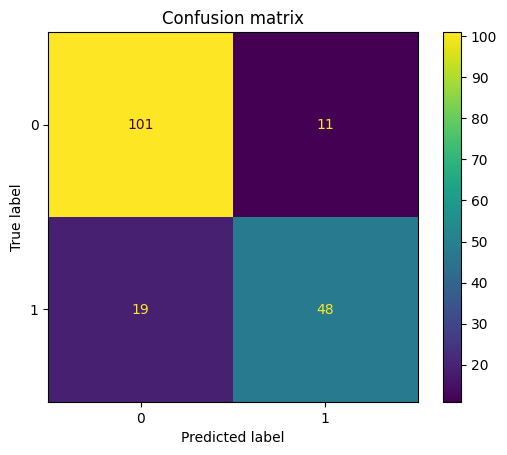

In [369]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion matrix")
plt.show()